In [11]:
# imports
import numpy as np
import cv2
import os
import tensorflow as tf
import kagglehub
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder


In [2]:
dataset_path = kagglehub.dataset_download("dhruvildave/english-handwritten-characters-dataset")

csv_path = os.path.join(dataset_path, "english.csv")
df = pd.read_csv(csv_path)

def load_image(row):
    img_path = os.path.join(dataset_path, row['image'])
    try:
        img = Image.open(img_path).convert("L").resize((28, 28))
        return np.array(img) / 255.0
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return np.zeros((28, 28))


print("Dataset path:", dataset_path)
print("First 5 records:")
print(df.head())

Dataset path: /kaggle/input/english-handwritten-characters-dataset
First 5 records:
                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


In [3]:
df = df[df['label'].isin(['a', 'b'])]

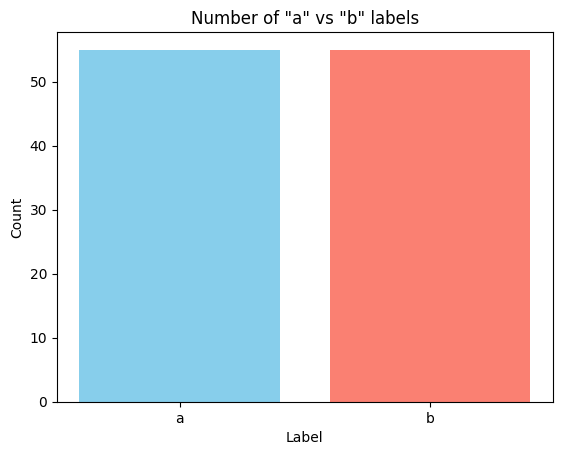

In [4]:
# Count occurrences of each label
label_counts = df['label'].value_counts()

# Plot bar graph
plt.bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of "a" vs "b" labels')
plt.show()

In [5]:
# Preprocess images and labels
images = np.stack(df.apply(load_image, axis=1)).reshape(-1, 28, 28, 1)
le = LabelEncoder()
# a = 0, and b = 1
labels_encoded = le.fit_transform(df['label'])

# Split into training and test sets (e.g., 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train on training data
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2%}, Test Loss: {test_loss:.4f}")

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5149 - loss: 1.0326 - val_accuracy: 0.2222 - val_loss: 0.9374
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5071 - loss: 0.7557 - val_accuracy: 0.2222 - val_loss: 1.5508
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4310 - loss: 1.1432 - val_accuracy: 0.3333 - val_loss: 0.8498
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5895 - loss: 0.7196 - val_accuracy: 0.6667 - val_loss: 0.6693
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4159 - loss: 0.7959 - val_accuracy: 0.2222 - val_loss: 1.3395
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4378 - loss: 1.0045 - val_accuracy: 0.7778 - val_loss: 0.5537
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5251 - loss: 0.7635 - val_accuracy: 0.7778 - val_loss: 0.5500
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4725 - loss: 0.8141 - val_accuracy: 0.2222 - val_loss: 1.1

In [6]:
predictions = model.predict(images)
predicted_classes = (predictions > 0.5).astype(int)  # Threshold at 0.5
print(predicted_classes.T)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1]]


In [7]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # List: [weights_array, biases_array]
    print(f"Layer {i} - {layer.name}:")
    if weights:
        print("Weights shape:", weights[0].shape)
        print("Biases shape:", weights[1].shape)
    else:
        print("No weights")

Layer 0 - flatten:
No weights
Layer 1 - dense:
Weights shape: (784, 1)
Biases shape: (1,)


In [8]:
weights, biases = model.layers[1].get_weights()

np.savetxt("weights_layer1.txt", weights.flatten())
np.savetxt("biases_layer1.txt", biases.flatten())

In [9]:
from PIL import Image
import numpy as np

img = Image.open("img037-054.png").convert("L").resize((28, 28))
arr = np.array(img) / 255.0
arr.astype(np.float32).tofile("a2_image.bin")

In [10]:
datpath = dataset_path + "/Img/img038-052"
print("Dataset path:", datpath)


Dataset path: /kaggle/input/english-handwritten-characters-dataset/Img/img038-052
